## Pandas 3 

- Operaciones con fechas
- Combinar dataframes
- Reacomodar datos 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
elenco = pd.read_csv('https://public-access-s3.s3.amazonaws.com/cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
# Base de datos 2

fechalanza = pd.read_csv('https://public-access-s3.s3.amazonaws.com/release_dates.csv', encoding='utf-8')
fechalanza.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [8]:
#Cambiamos a un formato date time

fechalanza = pd.read_csv('https://public-access-s3.s3.amazonaws.com/release_dates.csv' , parse_dates=['date'], infer_datetime_format=True)
fechalanza.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [9]:
# pandas "dt" = date time
flz = fechalanza

flz.date.dt.year

0         2007
1         2015
2         2015
3         2015
4         2016
          ... 
443551    2005
443552    2005
443553    2005
443554    2005
443555    2005
Name: date, Length: 443556, dtype: int64

<AxesSubplot:>

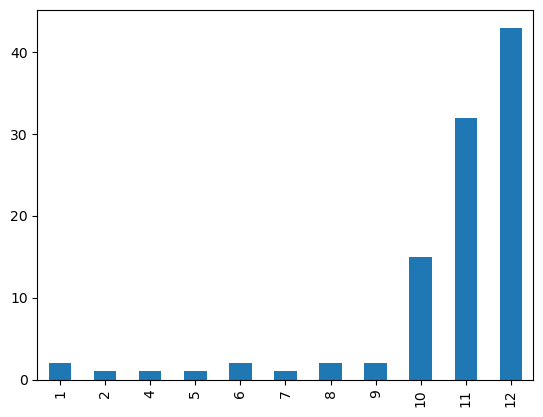

In [11]:
# ¿En que meses se lanzan mas comunmente peliculas que contienen la palabra "Christmas"?, esperando sea Diciembre...


flz = fechalanza 


flz = flz[(flz.title.str.contains('Christmas',case=False)) & (flz.country == 'USA')]

flz.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [ ]:
# Exploremos la funcionalidad para unir dataframes con el metodo "merge"

In [16]:
e = elenco
e = e[e.name == "Brad Pitt"]
e.head()

,title,year,name,type,character,n
1722096,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0
1722097,A River Runs Through It,1992,Brad Pitt,actor,Paul Maclean,2.0
1722098,Abby Singer,2003,Brad Pitt,actor,Himself,51.0
1722099,Across the Tracks,1990,Brad Pitt,actor,Joe Maloney,2.0
1722100,Allied,2016,Brad Pitt,actor,Max Vatan,1.0


In [12]:
# Nos interesa conocer la fecha de lanzamiento de las peliculas en la que ah participado Denzel Washington del dataframe 2

In [14]:
flz = fecha_lanz
flz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [25]:
# Es realmente sencillo con pandas y su poderoso comando "merge"
e = elenco

e = e[e.name == "Brad Pitt"]
pd.DataFrame(e)

e = e.merge(fecha_lanz)
pd.DataFrame(e)
e

,title,year,name,type,character,n,country,date
0,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0,USA,2013-11-08
1,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0,Armenia,2013-12-12
2,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0,Greece,2013-12-12
3,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0,Russia,2013-12-12
4,12 Years a Slave,2013,Brad Pitt,actor,Bass,53.0,Ukraine,2013-12-12
...,...,...,...,...,...,...,...,...
1898,World War Z 2,2017,Brad Pitt,actor,Gerry Lane,NaN,Bulgaria,2017-06-09
1899,World War Z 2,2017,Brad Pitt,actor,Gerry Lane,NaN,Norway,2017-06-09
1900,World War Z 2,2017,Brad Pitt,actor,Gerry Lane,NaN,Sweden,2017-06-09
1901,World War Z 2,2017,Brad Pitt,actor,Gerry Lane,NaN,UK,2017-06-09


## Otro concepto: Pivot

In [22]:
# Pivot permite el reacomodo de los valores del dataframe, moviendo una columna como indice, otra como llave de datos y otra para los valores

# Ejemplo fechas de lanzamiento de peliculas Harry Potter en Mexico, USA y Canada
flz = fecha_lanz 
flz = flz[flz.title.str.startswith("Fight Club")]

flz = flz[(flz.country == "Mexico") | (flz.country == "USA") | (flz.country == "Canada")]
flz 

,title,year,country,date
113532,Fight Club,1999,Canada,1999-10-15
113533,Fight Club,1999,USA,1999-10-15
113541,Fight Club,1999,Mexico,1999-11-05


In [24]:
flz = fecha_lanz 
flz = flz[flz.title.str.startswith("Fight Club")]
flz = flz[(flz.country == "Mexico") | (flz.country == "USA") | (flz.country == "Canada")]


flz = flz.pivot('title','country','date')
flz

country,Canada,Mexico,USA
title,,,
Fight Club,1999-10-15,1999-11-05,1999-10-15


## Ejercicios


In [29]:
# Del periodo 2010 al presente en cuantas peliculas hA participado la actriz "Nathalie Portman"?
e = elenco
e = e[e.name == "Natalie Portman"]
e = e[e.year >= 2010]
len(e)

15

In [33]:
# En que fechas fue lanzada cada pelicula de "Margot Robbie" dentro de un periodo de 1990 al presente en Mexico

flz = fecha_lanz
flz = flz[flz.country == 'Mexico']

e = elenco
e = e[e.name == 'Margot Robbie']
e = e[(e.year > 1990)]

e = e.merge(flz)
e

,title,year,name,type,character,n,country,date
0,About Time,2013,Margot Robbie,actress,Charlotte,9.0,Mexico,2013-12-06
1,Focus (II),2015,Margot Robbie,actress,Jess,2.0,Mexico,2015-03-05
2,Suicide Squad,2016,Margot Robbie,actress,Harley Quinn,4.0,Mexico,2016-08-04
3,The Big Short,2015,Margot Robbie,actress,Margot Robbie,NaN,Mexico,2016-01-08
4,The Legend of Tarzan,2016,Margot Robbie,actress,Jane Clayton,6.0,Mexico,2016-07-07
5,The Wolf of Wall Street,2013,Margot Robbie,actress,Naomi Lapaglia,3.0,Mexico,2014-01-10
6,Whiskey Tango Foxtrot,2016,Margot Robbie,actress,Tanya Vanderpoel,2.0,Mexico,2016-04-22


In [49]:
# En que dia de la semana se han lanzado en USA las peliculas de donde aparece Tom Hanks.. Incluir un grafico 

flz = fecha_lanz
flz = flz[flz.country == 'USA']

e = elenco
e = e[e.name == 'Tom Hanks'] 
e

wd = e.merge(flz)
wd


#wd = wd.rename({4:'Friday', 3:'Thursday', 2:'Wednesday'})
#wd.plot(kind='bar')

,title,year,name,type,character,n,country,date
0,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1.0,USA,1992-07-01
1,Angels & Demons,2009,Tom Hanks,actor,Robert Langdon,1.0,USA,2009-05-15
2,Apollo 13,1995,Tom Hanks,actor,Jim Lovell,1.0,USA,1995-06-30
3,Bachelor Party,1984,Tom Hanks,actor,Rick Gassko,1.0,USA,1984-06-29
4,Big,1988,Tom Hanks,actor,Josh,1.0,USA,1988-06-03
...,...,...,...,...,...,...,...,...
57,Toy Story 3,2010,Tom Hanks,actor,Woody,1.0,USA,2010-06-18
58,Toy Story 4,2018,Tom Hanks,actor,Woody,NaN,USA,2018-06-15
59,Turner & Hooch,1989,Tom Hanks,actor,Det. Scott Turner,1.0,USA,1989-07-28
60,Volunteers,1985,Tom Hanks,actor,Lawrence Whatley Bourne III,1.0,USA,1985-08-16


<AxesSubplot:ylabel='title,year'>

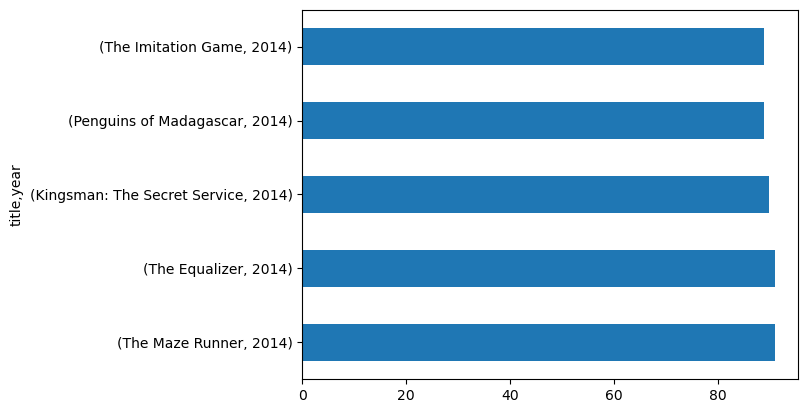

In [50]:
# Que peliculas han sido lanzadas en la mayor cantidad de paises , incluir en un grafico las 5 mayores

flz = fecha_lanz

flz = flz.groupby(['title','year'])
flz.size().sort_values(ascending=False)[:5].plot(kind='barh')


In [51]:
# Quien tiende a ser el actor si clasificado (n > 1) que mas a participado en peliculas donde el protagonista es Leonardo DiCaprio 

e = elenco
hf = e[(e.name == 'Leonardo DiCaprio') & (e.n == 1)]
er = e[(e.n > 1)]
mt = hf.merge(er,on=['title','year'])
mt.groupby(['name_x','name_y']).size().sort_values(ascending=False)

name_x             name_y             
Leonardo DiCaprio  Joseph P. Reidy        4
                   J.C. MacKenzie         3
                   Nellie Sciutto         3
                   Steve Witting          3
                   Joe Sheridan           2
                                         ..
                   Gloria Stuart          1
                   Golshifteh Farahani    1
                   Grace (II) Dove        1
                   Grant Swanby           1
                   Zineb Oukach           1
Length: 1064, dtype: int64